###### Import libraries and create data

In [1]:
import fastai
fastai.__version__

'1.0.39'

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import pandas as pd
from pathlib import Path
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from fastai import *
from fastai.vision import *
from fastai.vision.image import *
from fastai.callbacks import *
import torchvision
from fastai import basic_train
from torchvision.models.inception import BasicConv2d, InceptionA, InceptionB, InceptionC, InceptionD, InceptionE, InceptionAux

import cv2

from torchvision import models
from pretrainedmodels.models import bninception
from torch import nn
from collections import OrderedDict
import torch.nn.functional as F

import pickle

In [3]:
np.random.seed(42)

In [4]:
path = Path('data')

In [5]:
train_df = pd.read_csv(path / 'train.csv')

In [6]:
Target = train_df.Target.str.split()

In [7]:
%%time
idxes = list()
for i in range(28):
    idxes.append([])
    for j in range(len(Target)):
        if str(i) in Target[j]:
            idxes[i].append(j)
            

CPU times: user 8.22 s, sys: 0 ns, total: 8.22 s
Wall time: 8.22 s


In [8]:
for i in range(28):
    print(i, len(idxes[i]))

0 12885
1 1254
2 3621
3 1561
4 1858
5 2513
6 1008
7 2822
8 53
9 45
10 28
11 1093
12 688
13 537
14 1066
15 21
16 530
17 210
18 902
19 1482
20 172
21 3777
22 802
23 2965
24 322
25 8228
26 328
27 11


In [9]:
tmp_train_df = train_df.copy()

In [10]:
cell_8 = train_df.iloc[idxes[8]]

In [11]:
tmp_train_df = tmp_train_df.append(cell_8, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_8, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_8, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_8, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_8, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_8, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_8, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_8, ignore_index=True, verify_integrity=True)

In [12]:
cell_9 = train_df.iloc[idxes[9]]

In [13]:
tmp_train_df = tmp_train_df.append(cell_9, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_9, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_9, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_9, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_9, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_9, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_9, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_9, ignore_index=True, verify_integrity=True)

In [14]:
cell_10 = train_df.iloc[idxes[10]]

In [15]:
tmp_train_df = tmp_train_df.append(cell_10, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_10, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_10, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_10, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_10, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_10, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_10, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_10, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_10, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_10, ignore_index=True, verify_integrity=True)

In [16]:
cell_15 = train_df.iloc[idxes[15]]

In [17]:
tmp_train_df = tmp_train_df.append(cell_15, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_15, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_15, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_15, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_15, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_15, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_15, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_15, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_15, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_15, ignore_index=True, verify_integrity=True)

In [18]:
cell_27 = train_df.iloc[idxes[27]]

In [19]:
tmp_train_df = tmp_train_df.append(cell_27, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_27, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_27, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_27, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_27, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_27, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_27, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_27, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_27, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_27, ignore_index=True, verify_integrity=True)

In [20]:
cell_17 = train_df.iloc[idxes[17]]

In [21]:
tmp_train_df = tmp_train_df.append(cell_17, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_17, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_17, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_17, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_17, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_17, ignore_index=True, verify_integrity=True)

In [22]:
cell_20 = train_df.iloc[idxes[20]]

In [23]:
tmp_train_df = tmp_train_df.append(cell_20, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_20, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_20, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_20, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_20, ignore_index=True, verify_integrity=True)
tmp_train_df = tmp_train_df.append(cell_20, ignore_index=True, verify_integrity=True)

In [24]:
RESNET_ENCODERS = {
    34: torchvision.models.resnet34,
    50: torchvision.models.resnet50,
    101: torchvision.models.resnet101,
    152: torchvision.models.resnet152,
}

In [25]:
class Resnet4Channel(nn.Module):
    
    def __init__(self, encoder_depth=34, pretrained=True, num_classes=28):
        super().__init__()
        encoder = RESNET_ENCODERS[encoder_depth](pretrained=pretrained)
        w = encoder.conv1.weight
        
        self.conv1 = nn.Conv2d(4, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.conv1.weight = nn.Parameter(torch.cat((w, torch.zeros(64, 1, 7, 7)), dim=1))
        self.bn1 = encoder.bn1
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        
        self.layer1 = encoder.layer1
        self.layer2 = encoder.layer2
        self.layer3 = encoder.layer3
        self.layer4 = encoder.layer4
        
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.BatchNorm1d(2048),
            nn.Dropout(0.5),
            nn.Linear(2048, 28),
        )
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        
        x = x.view(x.size(0), -1)
        x = self.fc(x)


        return x

In [26]:
def open_4_channel(fname):
    fname = str(fname)
    if fname.endswith(".png"):
        fname = fname[:-4]
        
    colors = ['red', 'green', 'blue', 'yellow']
    flags = cv2.IMREAD_GRAYSCALE
    
    img = [cv2.imread(fname + '_' + color + '.png', flags).astype(np.float32) / 255 for color in colors]
    
    x = np.stack(img, axis=-1)
    
    return Image(pil2tensor(x, np.float32).float())

In [27]:
# src = (ImageItemList.from_csv(path, 'train.csv', folder='train', suffix='.png')
#       .random_split_by_pct(0.2)
#       .label_from_df(sep=' ', classes=[str(i) for i in range(28)]))

In [28]:
src = (ImageItemList.from_df(tmp_train_df, path, folder='train', suffix='.png')
      .random_split_by_pct(0.2)
      .label_from_df(sep=' ', classes=[str(i) for i in range(28)]))

In [29]:
src.train.x.open = open_4_channel
src.train.x.create_func = open_4_channel

In [30]:
src.valid.x.open = open_4_channel
src.valid.x.create_func = open_4_channel

In [31]:
test_ids = list(sorted(set(fname.split('_')[0] for fname in os.listdir(path / 'test'))))

In [32]:
test_fnames = [path/'test'/test_id for test_id in test_ids]

In [33]:
src.add_test(test_fnames, label='0');

In [34]:
src.test.x.open = open_4_channel
src.test.x.create_func = open_4_channel

In [35]:
protein_stats = ([0.08069, 0.05258, 0.05487, 0.08282], [0.13704, 0.10145, 0.15313, 0.13814])

In [36]:
trn_tfms, _ = get_transforms(do_flip=True, flip_vert=True, max_rotate=30., max_zoom=1, max_lighting=0.05, max_warp=0.01)

In [37]:
data = (src.transform((trn_tfms, _), size=512).databunch(bs=24).normalize(protein_stats))

In [38]:
# data.show_batch(rows=3, figsize=(12,9))

In [39]:
def myresnet50(pretrained):
    return Resnet4Channel(encoder_depth=50)

In [40]:
f1_score = partial(fbeta, thresh=0.2, beta=1)

In [41]:
loss_fn = F.binary_cross_entropy_with_logits
model = myresnet50(True)
optim = torch.optim.SGD

In [42]:
def custom_loss_func(model:nn.Module, xb:Tensor, yb:Tensor, loss_func:OptLossFunc=None, opt:OptOptimizer=None,
               cb_handler:Optional[CallbackHandler]=None)->Tuple[Union[Tensor,int,float,str]]:
    if not is_listy(xb): xb = [xb]
    if not is_listy(yb): yb = [yb]
    out = model(*xb)
    out = cb_handler.on_loss_begin(out)

    if not loss_func: return to_detach(out), yb[0].detach()
    loss = loss_func(out, *yb)
    
    return loss

In [43]:
def custom_fit(epochs:int, model:nn.Module, loss_func:LossFunction, opt:torch.optim.Optimizer,
        data:DataBunch, callbacks:Optional[CallbackList]=None, metrics:OptMetrics=None,
        gradient_accumulation_steps:int=16)->None:
    "Fit the `model` on `data` and learn using `loss_func` and `opt`."
    cb_handler = CallbackHandler(callbacks, metrics)
    pbar = master_bar(range(epochs))
    cb_handler.on_train_begin(epochs, pbar=pbar, metrics=metrics)

    exception=False
    try:
        for epoch in pbar:
            step = 0
            model.train()
            cb_handler.on_epoch_begin()

            for xb,yb in progress_bar(data.train_dl, parent=pbar):
                xb, yb = cb_handler.on_batch_begin(xb, yb)
                
                loss = custom_loss_func(model, xb, yb, loss_func, cb_handler=cb_handler)
                
                loss = cb_handler.on_backward_begin(loss)
                loss.backward()
                cb_handler.on_backward_end()

                if (step + 1) % gradient_accumulation_steps == 0:
                    opt.step()
                    cb_handler.on_step_end()
                    opt.zero_grad()
                step += 1
                
                loss = loss.detach().cpu()  
                if cb_handler.on_batch_end(loss): break

            if not data.empty_val:
                val_loss = validate(model, data.valid_dl, loss_func=loss_func, cb_handler=cb_handler, 
                                    pbar=pbar)
            else: val_loss=None
            if cb_handler.on_epoch_end(val_loss): break
    except Exception as e:
        exception = e
        raise e
    finally: cb_handler.on_train_end(exception)

In [44]:
class custom_learner(basic_train.Learner):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
    def fit(self, epochs:int, lr:Union[Floats,slice]=defaults.lr, wd:Floats=None, 
            callbacks:Collection[Callback]=None) -> None:
        lr = self.lr_range(lr)
        if wd is None: wd = self.wd
        if not getattr(self, 'opt', False): self.create_opt(lr, wd)
        else: self.opt.lr,self.opt.wd = lr,wd
        callbacks = [cb(self) for cb in self.callback_fns] + listify(callbacks)
        custom_fit(epochs, self.model, self.loss_func, opt=self.opt, data=self.data, metrics=self.metrics,
            callbacks=self.callbacks+callbacks)

In [45]:
learn = custom_learner(data, model, opt_func=optim, loss_func=loss_fn, metrics=[f1_score], 
                           callback_fns=[partial(ReduceLROnPlateauCallback, monitor='val_loss', 
                                                 patience=3),
                                         partial(EarlyStoppingCallback, monitor='val_loss', 
                                                 min_delta=0.001, patience=9)])

In [ ]:
learn.fit(50, lr=0.2)

epoch,train_loss,valid_loss,fbeta
1,0.202567,0.255509,0.323714
2,0.185612,0.215241,0.335019
3,0.175504,0.674475,0.349706
4,0.172850,0.188015,0.367841
5,0.168217,0.207368,0.362044
6,0.159926,0.159537,0.412940
7,0.154102,0.168445,0.408203
8,0.145560,0.185565,0.392115
9,0.145677,0.154939,0.449672
10,0.143858,0.138522,0.512359


Epoch 18: reducing lr to 0.04000000000000001
Epoch 29: reducing lr to 0.008000000000000002


In [ ]:
learn.save("resnet50-gradaccu")

In [ ]:
preds, avg_pred, y = learn.TTA(beta=None, scale=1.05, ds_type=DatasetType.Test)

pred_labels = [' '.join(list([str(i) for i in np.nonzero(row > 0.2)[0]])) for row in np.array(avg_pred)]
df = pd.DataFrame({'Id':test_ids,'Predicted':pred_labels})
df.to_csv(path/'resnet50_grad-avg_pred-0.2.csv', header=True, index=False)

pred_labels = [' '.join(list([str(i) for i in np.nonzero(row > 0.2)[0]])) for row in np.array(preds)]
df = pd.DataFrame({'Id':test_ids,'Predicted':pred_labels})
df.to_csv(path/'resnet50_grad-preds_v1-0.2.csv', header=True, index=False)

In [ ]:
pred_labels = [' '.join(list([str(i) for i in np.nonzero(row > 0.15)[0]])) for row in np.array(avg_pred)]
df = pd.DataFrame({'Id':test_ids,'Predicted':pred_labels})
df.to_csv(path/'resnet50_grad-avg_pred-0.1.csv', header=True, index=False)

pred_labels = [' '.join(list([str(i) for i in np.nonzero(row > 0.15)[0]])) for row in np.array(preds)]
df = pd.DataFrame({'Id':test_ids,'Predicted':pred_labels})
df.to_csv(path/'resnet50_grad-preds_v1--0.1.csv', header=True, index=False)

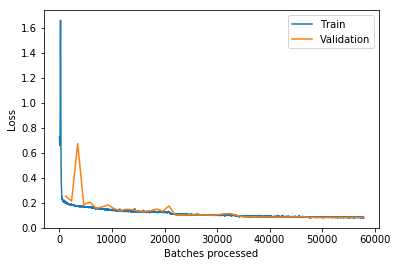

In [99]:
learn.recorder.plot_losses()

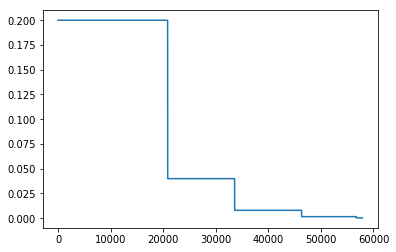

In [100]:
learn.recorder.plot_lr()

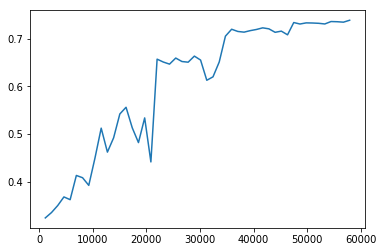

In [101]:
learn.recorder.plot_metrics()

In [46]:
_ = learn.load("resnet50-gradaccu")

In [ ]:
learn.fit(50, lr=0.02)

epoch,train_loss,valid_loss,fbeta
1,0.095875,0.102665,0.669146
2,0.095519,0.089696,0.705944
3,0.094760,0.093494,0.691264
4,0.093069,0.103376,0.667630
5,0.096752,0.100428,0.659992
6,0.093842,0.090722,0.707005
7,0.085545,0.081663,0.744795
8,0.086302,0.080876,0.746172
9,0.084467,0.080963,0.754046
10,0.084217,0.078754,0.755242


Epoch 6: reducing lr to 0.004
